# Download The Dataset

In [7]:
import os
import opendatasets as od
import pandas as pd


In [8]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [9]:
os.listdir('rossmann-store-sales')

['rossmann-store-sales.zip',
 'sample_submission.csv',
 'store.csv',
 'test.csv',
 'train.csv']

In [10]:
ross_df = pd.read_csv('./rossmann-store-sales/train.csv', low_memory=False)
store_df = pd.read_csv('./rossmann-store-sales/store.csv')
test_df = pd.read_csv('./rossmann-store-sales/test.csv')
submission_df = pd.read_csv('./rossmann-store-sales/sample_submission.csv')

In [11]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [12]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [13]:
test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [14]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


Merging store to test and train data 

In [15]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [16]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [17]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# EDA

# Preprocessing and Feature Engineering

Date

In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [19]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [20]:
split_date(merged_df)
split_date(merged_test_df)

In [21]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


Store/open and closed

In [22]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [23]:
merged_df = merged_df[merged_df.Open == 1].copy()

Competition

In [24]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [25]:
comp_months(merged_df)
comp_months(merged_test_df)

In [26]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [27]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
428587,2014-06-12,15140.0,2006.0,12.0,90.0
763001,2013-08-16,1070.0,NaN,NaN,0.0
988552,2013-01-26,3720.0,2010.0,2.0,35.0
773568,2013-08-07,250.0,2001.0,12.0,140.0
263160,2014-12-03,17540.0,2012.0,6.0,30.0
228356,2015-01-08,3290.0,2007.0,1.0,96.0
112226,2015-04-22,2050.0,2007.0,3.0,97.0
607802,2014-01-03,280.0,NaN,NaN,0.0
742723,2013-09-04,2620.0,NaN,NaN,0.0
521217,2014-03-21,9670.0,NaN,NaN,0.0


# Promo 2

In [28]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [29]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [30]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [31]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
842460,2013-06-06,1,2014.0,40.0,"Jan,Apr,Jul,Oct",0.000000,0
317546,2014-10-06,1,2009.0,37.0,"Jan,Apr,Jul,Oct",60.918033,1
256811,2014-12-10,1,2013.0,36.0,"Mar,Jun,Sept,Dec",15.213115,1
1000483,2013-01-16,0,NaN,NaN,NaN,0.000000,0
803618,2013-07-11,1,2009.0,37.0,"Jan,Apr,Jul,Oct",45.934426,1
498618,2014-04-11,1,2009.0,37.0,"Jan,Apr,Jul,Oct",54.950820,1
166111,2015-03-05,1,2014.0,40.0,"Jan,Apr,Jul,Oct",5.114754,0
937412,2013-03-13,1,2010.0,13.0,"Jan,Apr,Jul,Oct",35.540984,0
247601,2014-12-19,1,2010.0,13.0,"Jan,Apr,Jul,Oct",56.721311,0
312466,2014-10-11,1,2011.0,27.0,"Feb,May,Aug,Nov",39.213115,0


# Input Train and Targets

In [32]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [33]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [34]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [35]:
targets

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

In [36]:
test_inputs = merged_test_df[input_cols].copy()

In [37]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

# Impute missing numerical data

In [38]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [39]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [40]:
max_distance = inputs.CompetitionDistance.max()

In [41]:
max_distance

75860.0

In [42]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

# Scale Numerical Values

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [45]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Encode Categorical Columns

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [48]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Extract out all the numeric data for training.

In [49]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Model Selection Gradient Boosting

In [50]:
from xgboost import XGBRegressor

In [51]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [52]:
%%time
model.fit(X, targets)

Wall time: 2.16 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Prediction

In [53]:
preds = model.predict(X)

In [54]:
preds

array([ 8127.9404,  7606.919 ,  8525.857 , ...,  6412.8247,  9460.068 ,
       10302.145 ], dtype=float32)

In [55]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [56]:
rmse(preds, targets)

2377.752008804669

# Visualzation

In [181]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

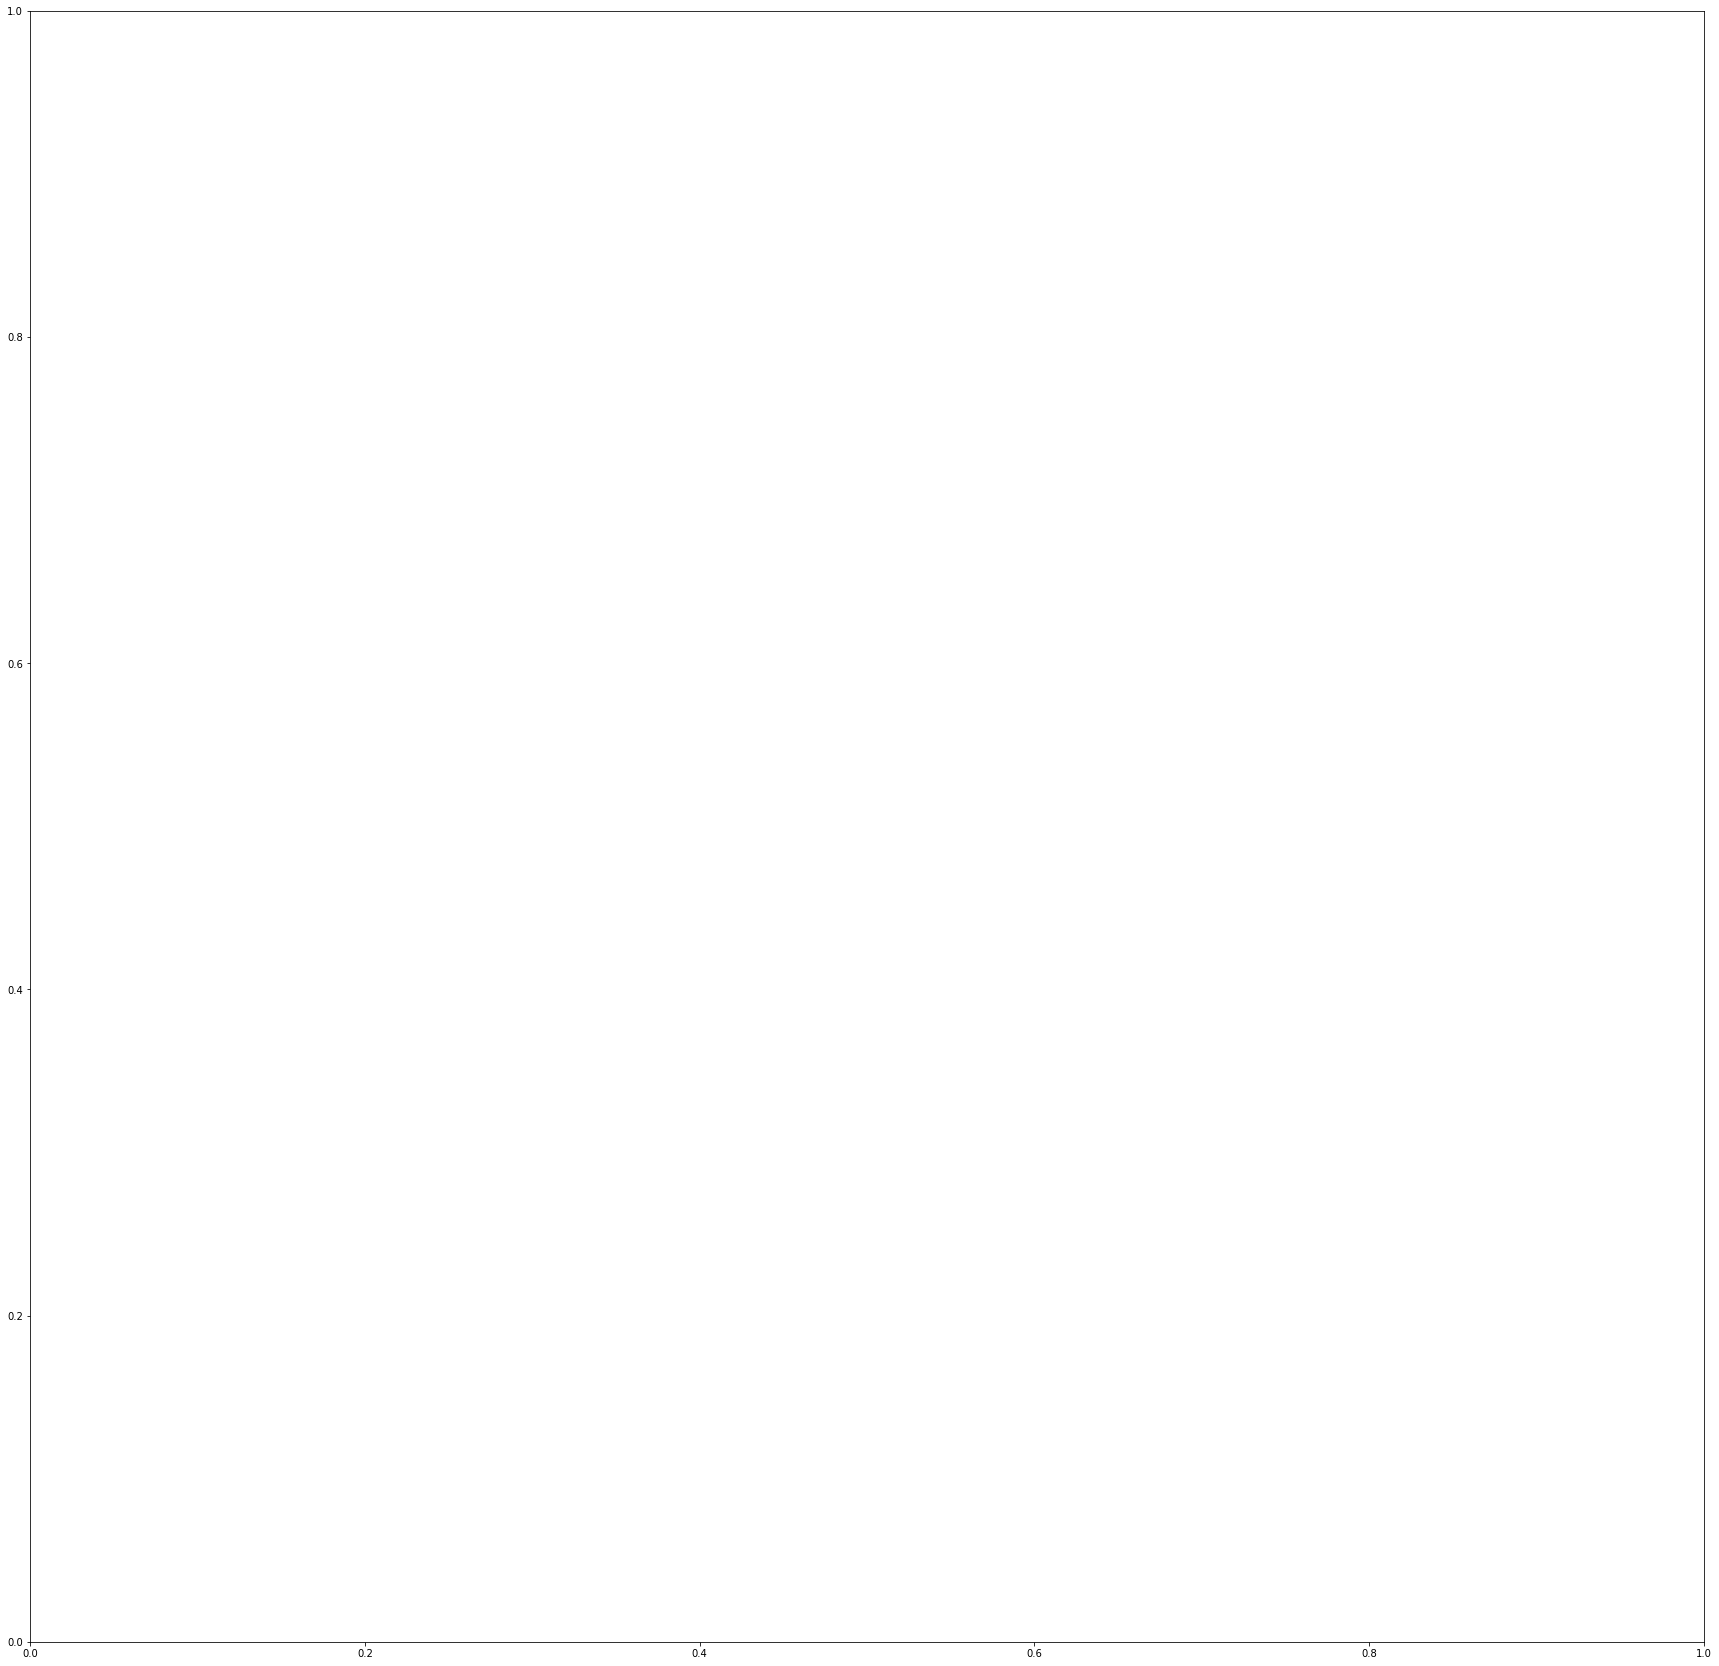

In [182]:
plot_tree(model, rankdir='LR');

In [ ]:
plot_tree(model, rankdir='LR', num_trees=1);

In [ ]:
plot_tree(model, rankdir='LR', num_trees=19);

In [ ]:
trees = model.get_booster().get_dump()

In [ ]:
len(trees)

In [ ]:
print(trees[0])

# Feature Importance

In [59]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [60]:
importance_df.head(10)


,feature,importance
1,Promo,0.317473
24,StoreType_b,0.086472
12,DayOfWeek_1,0.082269
5,Promo2,0.063986
3,CompetitionDistance,0.045053
29,Assortment_c,0.040226
27,Assortment_a,0.038759
9,Month,0.038493
0,Store,0.038119
8,Day,0.033209


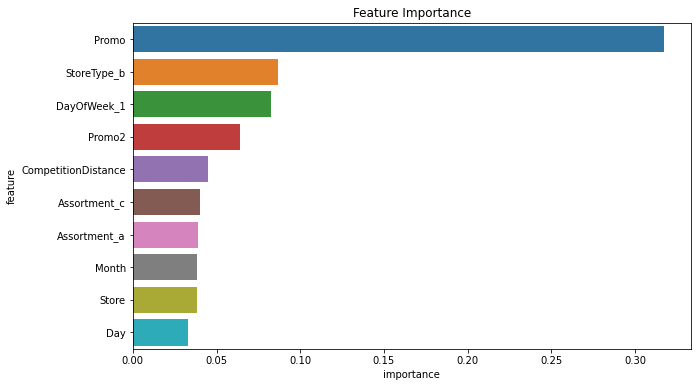

In [61]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# K Fold Cross Validation


In [62]:
from sklearn.model_selection import KFold

In [63]:
def train_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train,train_targets)
    train_rmse = rmse((model.predict(X_train)), train_targets)
    val_rmse = rmse((model.predict(X_val)), val_targets)
    return model, train_rmse, val_rmse

In [64]:
kfold = KFold(n_splits=5)

In [65]:
models = []

for train_idxs , val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_evaluate(X_train, train_targets, X_val, val_targets,max_depth=4,n_estimators=20)

    models.append(model)

    print('{} {}'.format(train_rmse,val_rmse))

2352.216448531526 2424.6228916973314
2406.709513789309 2451.9646038059277
2365.7354745443067 2336.984157073758
2366.4732092777763 2460.8995475901697
2379.3752997474626 2440.665320626728


In [66]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [67]:
preds = predict_avg(models, X)

In [68]:
preds

array([8021.374 , 7577.715 , 8747.863 , ..., 7615.0303, 7924.784 ,
       9600.297 ], dtype=float32)

# HyperParameter Tuning and Regularization

In [69]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)


In [72]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

n_estimators

In [73]:
test_params(n_estimators=10)

Train RMSE: 2342.43767337071, Validation RMSE: 2341.141435649751


In [74]:
test_params(n_estimators=30)


Train RMSE: 1887.6815182545213, Validation RMSE: 1894.054330583023


In [75]:
test_params(n_estimators=100)


Train RMSE: 1206.5869096994986, Validation RMSE: 1212.5253194462343


In [76]:
test_params(n_estimators=240)


Train RMSE: 905.2019600198329, Validation RMSE: 914.8275135623642


max_depth

In [77]:
test_params(max_depth = 2)

Train RMSE: 2347.3401934692247, Validation RMSE: 2350.6146281485794


In [78]:
test_params(max_depth = 5)

Train RMSE: 1429.9010756043142, Validation RMSE: 1435.6020207840868


In [79]:
test_params(max_depth = 10)

Train RMSE: 699.6478002097136, Validation RMSE: 781.6617529699761


Learning Rate

In [80]:
test_params(n_estimator =50 , learning_rate=0.01)

[13:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train RMSE: 3655.936689062684, Validation RMSE: 3646.846763074418


In [81]:
test_params(n_estimator =50 , learning_rate=0.1)

[13:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train RMSE: 1898.249078545935, Validation RMSE: 1902.598711585735


In [82]:
test_params(n_estimator =50 , learning_rate=0.3)

[13:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train RMSE: 1206.5869096994986, Validation RMSE: 1212.5253194462343


In [83]:
test_params(n_estimator =50 , learning_rate=0.9)

[13:38:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train RMSE: 957.2140282078152, Validation RMSE: 973.1321233988135


In [84]:
test_params(n_estimator =50 , learning_rate=0.99)

[13:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train RMSE: 982.6038645050033, Validation RMSE: 997.9264317214219


Booster

In [85]:
test_params(booster='gblinear')

Train RMSE: 2727.227133266162, Validation RMSE: 2717.5000502943503


# Final Model

In [ ]:
model = XGBRegressor(n_jobs=-1, 
                     random_state=42, 
                     n_estimators=100, 
                     learning_rate=0.2,
                     max_depth=10,
                     subsample=0.9, 
                     colsample_bytree=0.7).fit(X,targets)

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
submission_df['Sales']  = test_preds

In [ ]:
test_df.Open.isna().sum()

In [ ]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)

In [ ]:
submission_df


In [ ]:
submission_df.to_csv('submission.csv', index=None)


# GridSearchCV

In [86]:
from xgboost.sklearn import XGBRegressor

In [87]:
xgb1 = XGBRegressor()

In [92]:
parameters = {'learning_rate': [0.01, 0.1,0.3,0.9],
              'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
              'n_estimators': [5, 10, 50, 100, 250]}

In [127]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [95]:
xgb_grid = GridSearchCV(estimator=xgb1,
                        param_grid=parameters,
                        verbose=10,
                        n_jobs = -1,
                        cv = 2).fit(X,targets)

Fitting 2 folds for each of 160 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed: 2

In [96]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8142063585748515
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 250}


Grid Search CV final Model

In [149]:
model = XGBRegressor(learning_rate = 0.1, max_depth= 10, n_estimators= 250).fit(X,targets)

In [150]:
test_preds = model.predict(X_test)

# RandomSearch CV

In [168]:
rand_parameters = {'learning_rate': np.arange(0.01,0.99),
                    'max_depth': np.arange(1,20),
                      'n_estimators': np.arange(90,500)}

In [169]:
xgb_rand = RandomizedSearchCV(estimator=xgb1,
                        param_distributions=rand_parameters,
                        verbose=10,
                        n_iter=10,
                        n_jobs = -1,
                        cv = 2).fit(X,targets)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed:  1.3min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed:  3.9min remaining:  7.2min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:  6.0min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed:  6.2min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  7.1min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 10.1min finished


In [170]:
print(xgb_rand.best_score_)
print(xgb_rand.best_params_)

0.6269035280941708
{'n_estimators': 234, 'max_depth': 19, 'learning_rate': 0.01}


In [174]:
model = XGBRegressor(learning_rate = 0.1, max_depth= 19, n_estimators= 234).fit(X,targets)

In [175]:
test_preds = model.predict(X_test)

In [180]:
test_params(learning_rate = 0.1, max_depth= 19, n_estimators= 234)

Train RMSE: 149.8383052947166, Validation RMSE: 804.4962176529864


# Submission

In [176]:
submission_df['Sales']  = test_preds

In [177]:
test_df.Open.isna().sum()

11

In [178]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1.)
submission_df


,Id,Sales
0,1,4309.237793
1,2,7589.503418
2,3,8962.559570
3,4,6991.644531
4,5,6757.610840
...,...,...
41083,41084,3007.844482
41084,41085,5770.184570
41085,41086,6334.894043
41086,41087,19394.597656


In [179]:
submission_df.to_csv('submission.csv', index=None)